# Test the Model

In [95]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import cv2
import unzip


DATA  AUGMENTATION

In [17]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale = 1./255, shear_range=0.2, zoom_range=0.2,horizontal_flip=True,vertical_flip=False)
test_datagen = ImageDataGenerator(rescale=1./255)

training_set

In [23]:
x_train=train_datagen.flow_from_directory('../../../data collection/conversation engine for deaf and dumb/Dataset/training_set',
                                          target_size=(64,64),batch_size=100,class_mode='categorical', color_mode ="grayscale")

Found 15750 images belonging to 9 classes.


test_set

In [24]:
x_test = test_datagen.flow_from_directory("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set", 
                                          target_size=(64,64),batch_size=100,class_mode='categorical', color_mode ="grayscale")

Found 2250 images belonging to 9 classes.


Train

In [25]:
len(x_train)

158

Test

In [26]:
len(x_test)

23

Train class

In [27]:
x_train.class_indices

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8}

Import Libraries

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Convolution2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dropout
from keras.layers import Flatten

#Creating the model

In [29]:
model=Sequential()

Adding Convolution Layer

In [30]:
model.add(Convolution2D(32,(3,3), input_shape=(64,64,1), activation = 'relu'))

Adding Pooling Layer

In [31]:
model.add(MaxPooling2D(pool_size=(2,2)))

Adding Flatten Layer

In [32]:
model.add(Flatten())

Adding Dense Layer

In [33]:
model.add(Dense(300,activation='relu'))
model.add(Dense(512,activation='relu'))

Adding Output Layer

In [34]:
model.add(Dense(9, activation='softmax'))

Compile the Model

In [36]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

Fit and Save model

In [37]:
model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)

C:\Users\DHIWICSHEN\AppData\Local\Temp\ipykernel_10748\43643550.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(x_train, steps_per_epoch=30, epochs=10, validation_data=x_test,validation_steps=50)


Epoch 1/10
30/30 [==============================] - 54s 2s/step - loss: 0.8658 - accuracy: 0.6820 - val_loss: 0.3993 - val_accuracy: 0.8720
Epoch 2/10
30/30 [==============================] - 28s 934ms/step - loss: 0.2163 - accuracy: 0.9322
Epoch 3/10
30/30 [==============================] - 25s 838ms/step - loss: 0.1350 - accuracy: 0.9573
Epoch 4/10
30/30 [==============================] - 24s 797ms/step - loss: 0.0936 - accuracy: 0.9697
Epoch 5/10
30/30 [==============================] - 24s 779ms/step - loss: 0.0783 - accuracy: 0.9757
Epoch 6/10
30/30 [==============================] - 17s 562ms/step - loss: 0.0481 - accuracy: 0.9860
Epoch 7/10
30/30 [==============================] - 17s 583ms/step - loss: 0.0373 - accuracy: 0.9890
Epoch 8/10
30/30 [==============================] - 18s 592ms/step - loss: 0.0214 - accuracy: 0.9947
Epoch 9/10
30/30 [==============================] - 14s 479ms/step - loss: 0.0271 - accuracy: 0.9907
Epoch 10/10
30/30 [==============================] -

Save Model

In [39]:
model.save('Model.h5')

# TEST THE MODEL

In [40]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import cv2

Load Model

In [41]:
model = load_model('Model.h5')

Load Image

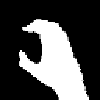

In [59]:
img = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/C/50.png',
                     target_size = (100,100))
img

In [53]:
from skimage.transform import resize
def detect(frame):
    img=image.img_to_array(frame)
    img = resize(img,(64,64,1))
    img = np.expand_dims(img,axis=0)
    pred=np.argmax(model.predict(img))
    op=['A','B','C','D','E','F','G','H','I']
    print("THE PREDICTED LETTER IS ",op[pred])

Detect Image Letter

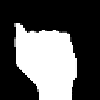

In [77]:
imgA = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/A/50.png',
                     target_size = (100,100))
imgA

In [78]:
imgA=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/A/50.png")
detect(imgA)

1/1 [==============================] - 0s 28ms/step
THE PREDICTED LETTER IS  A


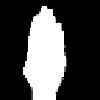

In [79]:
imgB = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/B/50.png',
                     target_size = (100,100))
imgB

In [80]:
imgB=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/B/50.png")
detect(imgB)

1/1 [==============================] - 0s 36ms/step
THE PREDICTED LETTER IS  B


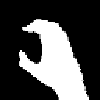

In [81]:
imgC = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/C/50.png',
                     target_size = (100,100))
imgC

In [82]:
imgC=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/C/50.png")
detect(imgC)

1/1 [==============================] - 0s 47ms/step
THE PREDICTED LETTER IS  C


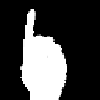

In [83]:
imgD = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/D/50.png',
                     target_size = (100,100))
imgD

In [84]:
imgD=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/D/50.png")
detect(imgD)

1/1 [==============================] - 0s 32ms/step
THE PREDICTED LETTER IS  D


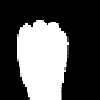

In [85]:
imgE = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/E/50.png',
                     target_size = (100,100))
imgE

In [86]:
imgE=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/E/50.png")
detect(imgE)

1/1 [==============================] - 0s 29ms/step
THE PREDICTED LETTER IS  E


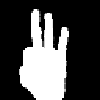

In [87]:
imgF = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/F/50.png',
                     target_size = (100,100))
imgF

In [88]:
imgF=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/F/50.png")
detect(imgF)

1/1 [==============================] - 0s 33ms/step
THE PREDICTED LETTER IS  F


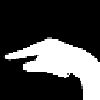

In [89]:
imgG= image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/G/50.png',
                     target_size = (100,100))
imgG

In [90]:
imgG=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/G/50.png")
detect(imgG)

1/1 [==============================] - 0s 46ms/step
THE PREDICTED LETTER IS  G


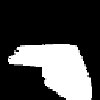

In [91]:
imgH = image.load_img('../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/H/50.png',
                     target_size = (100,100))
imgH

In [94]:
imgH=image.load_img("../../../data collection/conversation engine for deaf and dumb/Dataset/test_set/H/50.png")
detect(imgH)

1/1 [==============================] - 0s 35ms/step
THE PREDICTED LETTER IS  I
